<a href="https://colab.research.google.com/github/lisaong/hss/blob/master/04_pose_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pose Estimation Workshop

In this notebook, we will explore OpenPose, a pose estimation library. OpenPose detects human body keypoints using single images.

https://github.com/CMU-Perceptual-Computing-Lab/openpose

It uses a multi-person pose estimation model. Given an input colour image, the model returns two outputs:
1. Confidence maps of body part locations ("keypoints")
2. Part affinity heatmaps for each keypoint pair ("associations" between body parts). 

![multipose](https://github.com/ZheC/Realtime_Multi-Person_Pose_Estimation/raw/master/readme/arch.png)

More details on the model are here: https://github.com/ZheC/Realtime_Multi-Person_Pose_Estimation

## Example Use Cases

Pose estimation models can be used in video pre-processing to extract poses for further analysis. For example, in this paper, the sequence of poses are fed into a Hidden Markov Model for predicting future poses. Other use cases are gaming, medical diagnosis, robotic control, driver assistant, etc (see: https://en.wikipedia.org/wiki/Articulated_body_pose_estimation)

![pose-dmm-dicta-17](https://github.com/lisaong/hss/blob/master/assets/pose-dmm-dicta-17.png?raw=1)

Source: Toyer et. al., Human Pose Forecasting via Deep Markov Models, 2017

### Other Solutions

https://github.com/facebookresearch/VideoPose3D

## Running OpenPose from the Command Line

We will be exploring the OpenPose Demo command line application to extract poses from a video file.

The poses will be saved to JSON.

### Windows Setup (Optional)

1. Download OpenPose binaries from https://github.com/CMU-Perceptual-Computing-Lab/openpose/releases. 

   If you don't have a GPU, use this version: openpose-1.5.1-binaries-win64-only_cpu-python-flir-3d.zip

2. Unzip the file

3. The pre-trained models are not included in the zip file because they are quite large. Download them:

```
cd openpose-1.5.1-win64-only_cpu-python-flir-3d\openpose\models

getModels.bat
```

The download should take about 5-10 minutes.

### Google Colab Setup (Recommended)

You can build OpenPose using Google Colab with GPU enabled. Follow the instructions [in this notebook](https://github.com/nicholashojunhui/hss/blob/main/openpose/OpenPose_on_Colab.ipynb).

This should take about 20 minutes to compile.

## Generating Keypoints from Video

After OpenPose has been installed, you can use it to process videos and extract the poses.

Recall that poses can be described by 2-D or 3-D coordinates of body parts and joints with a confidence probability for each coordinate. 

These coordinates + confidence (x, y, confidence) or (x, y, z, confidence) are known as "keypoints". 

OpenPose will split video into frames, and for each frame, run a CNN-based model to extract keypoints for all the people found in the frame.


### Windows (Optional)

1. <font color='red'>**[Important] run the demo from the top level openpose folder, not the subfolders:**</font>

```
cd openpose-1.5.1-win64-only_cpu-python-flir-3d\openpose

bin\OpenPoseDemo.exe --part_candidates --write_json output --video examples\media\video.avi --frame_first 0 --frame_step 1 --frame_last 10 --display 0 --disable_blending --render_pose 0
```

   The above command runs the demo for face and hand keypoint detection, and writes the results as JSON format in a folder called `output`. The `part_candidates` option will include predicted poses. It will stop after 10 frames.

2. To show the video while capturing, omit the last 3 options (starting with `--display 0` onwards):

```
bin\OpenPoseDemo.exe --part_candidates --write_json output --video examples\media\video.avi --frame_first 0 --frame_step 1 --frame_last 10
```

   This will run very slowly on a CPU-only version.

3. Other options are documented at https://github.com/CMU-Perceptual-Computing-Lab/openpose/blob/master/doc/demo_overview.md, and also here:

```
bin\OpenPoseDemo.exe --help
```

### Google Colab (Recommended)

Continue with `OpenPose_on_Colab.ipynb` to generate keypoints. You will need to use that notebook's session which has the OpenPose that you built.

The command should be something like:

```
! cd openpose && ./build/examples/openpose/openpose.bin --video ./examples/media/video.avi --frame_first 0 --frame_step 1 --frame_last 10 --display 0 --disable_blending --write_coco_json output.coco.json
```


## Exploring keypoints

*This part does not require OpenPose. It just performs post-processing.*

The following section shows how to take the keypoints and plot them. 

For this section, we will use pre-extracted keypoint data in the HSS github repository, under the `data\openpose` folder.  This is the same set of keypoints extracted from the earlier video (but run from a GPU to speed things up).

The output format is documented here:
https://github.com/CMU-Perceptual-Computing-Lab/openpose/blob/master/doc/output.md

In [21]:
# If running from colab
!git clone https://github.com/nicholashojunhui/hss
HSS_DIR='/content/hss'

# If running on Windows, from the hss repository root
#HSS_DIR='.'

fatal: destination path 'hss' already exists and is not an empty directory.


In [22]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import sys
import numpy as np
from sklearn.metrics.pairwise import paired_distances

# requires: conda install opencv
import cv2

plt.style.use('seaborn-white')

In [23]:
# load the 200th frame
frame = json.load(open(f'{HSS_DIR}/data/openpose/video_000000000200_keypoints.json', 'rb'))
frame

{'part_candidates': [{'0': [478.574,
    131.665,
    0.920473,
    964.311,
    135.64,
    0.906362,
    590.237,
    147.501,
    0.64364,
    664.69,
    147.439,
    0.120312,
    745.06,
    155.298,
    0.777039,
    402.225,
    159.128,
    0.301092,
    541.349,
    164.982,
    0.765885,
    868.348,
    165.044,
    0.0973637,
    206.186,
    180.698,
    0.876768],
   '1': [51.4158,
    149.457,
    0.91052,
    294.391,
    149.373,
    0.916501,
    1170.1,
    151.314,
    0.530841,
    1058.53,
    153.277,
    0.878551,
    1228.88,
    153.457,
    0.0513227,
    662.699,
    161.093,
    0.314622,
    1101.47,
    161.109,
    0.0939921,
    476.573,
    163.124,
    0.946799,
    592.201,
    163.149,
    0.87346,
    402.121,
    168.971,
    0.411564,
    868.43,
    168.974,
    0.407426,
    1215.13,
    170.915,
    0.0771504,
    335.521,
    178.701,
    0.819016,
    543.213,
    178.846,
    0.912015,
    915.428,
    180.749,
    0.72971,
    731.254,
  

In [24]:
# count how many people
len(frame['people'])

13

In [25]:
# what keypoints are logged for each person
frame['people'][0].keys()

dict_keys(['pose_keypoints_2d', 'face_keypoints_2d', 'hand_left_keypoints_2d', 'hand_right_keypoints_2d', 'pose_keypoints_3d', 'face_keypoints_3d', 'hand_left_keypoints_3d', 'hand_right_keypoints_3d'])

In [26]:
# format is x1, y1, c1, x2, y2, c2, ...
# x, y coordinates with a confidence
frame['people'][0]['pose_keypoints_2d']

[0,
 0,
 0,
 51.4158,
 149.457,
 0.91052,
 76.9174,
 147.491,
 0.893503,
 102.333,
 180.81,
 0.883591,
 102.348,
 217.956,
 0.211567,
 22.0453,
 153.333,
 0.866329,
 4.38107,
 202.29,
 0.831755,
 22.0122,
 225.811,
 0.729868,
 63.169,
 227.773,
 0.801695,
 82.7451,
 227.694,
 0.807339,
 84.8005,
 278.683,
 0.850238,
 70.9845,
 323.821,
 0.852812,
 45.5556,
 229.724,
 0.771841,
 65.1485,
 280.619,
 0.790963,
 71.0001,
 331.561,
 0.735317,
 0,
 0,
 0,
 0,
 0,
 0,
 59.2899,
 118.068,
 0.790251,
 33.7925,
 120.036,
 0.815352,
 84.6441,
 351.186,
 0.336659,
 74.9327,
 349.186,
 0.281496,
 69.0845,
 337.412,
 0.385363,
 76.9073,
 351.132,
 0.659874,
 80.8557,
 349.201,
 0.680061,
 67.073,
 333.516,
 0.707275]

In [27]:
def keypoints_to_dataframe(keypoints):
    """Converts a flat keypoints list (x1, y1, c1, x2, y2, c2) into a pandas DataFrame"""
    return pd.DataFrame({'x': keypoints[::3], 'y': keypoints[1::3], 'c': keypoints[2::3]})

### Drawing Skeletons

The keypoints follow the BODY_25 format, which can be used to connect the points to make a skeleton

<img src='https://github.com/CMU-Perceptual-Computing-Lab/openpose/raw/master/doc/media/keypoints_pose_25.png' width=300/>

In [28]:
# Source: https://github.com/CMU-Perceptual-Computing-Lab/openpose/blob/master/doc/output.md#pose-output-format-coco
Pose_part_pairs = [
    (1,8), (1,2), (1,5), (2,3), (3,4), (5,6), (6,7), (8,9), (9,10), (10,11),
    (8,12), (12,13), (13,14), (1,0), (0,15), (15,17), (0,16), (16,18), (2,17), (5,18),
    (14,19), (19,20), (14,21), (11,22), (22,23), (11,24)
]

def draw_skeleton(ax, df):
    for p, q in Pose_part_pairs:
        if df.x[p] != 0 and df.x[q] != 0 and df.y[p] != 0 and df.y[q] != 0:
            ax.plot([df.x[p], df.x[q]], [df.y[p], df.y[q]], color='red')

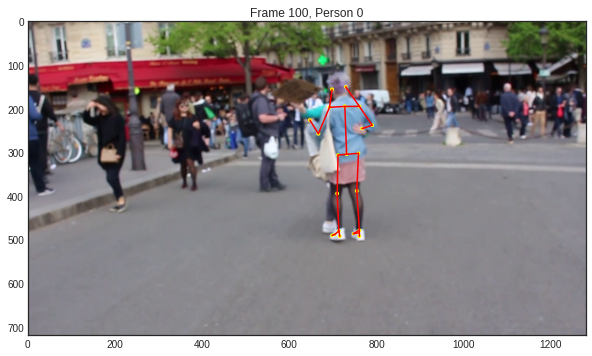

In [29]:
fig, ax = plt.subplots(figsize=(10, 8))

video = cv2.VideoCapture(f'{HSS_DIR}/data/openpose/video.avi')

frame = json.load(open(f'{HSS_DIR}/data/openpose/video_000000000100_keypoints.json', 'rb'))
df = keypoints_to_dataframe(frame['people'][0]['pose_keypoints_2d'])

for i in range(100):
    _, image = video.read()
_, image1 = video.read()

# different size dots according to probability
ax.scatter(df.x, df.y, s=df.c*10, color='yellow')
ax.set(title='Frame 100, Person 0')

# openCV uses BGR, convert to RGB
ax.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))

draw_skeleton(ax, df)

### Plotting a Scene

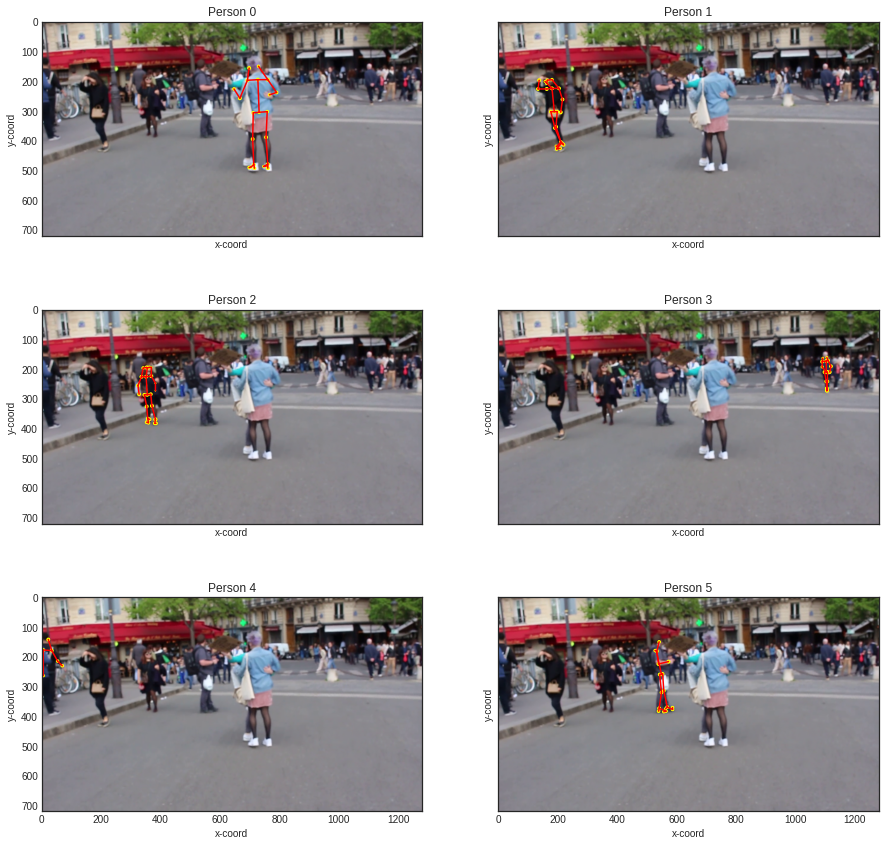

In [30]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 15), sharex=True, sharey=True)
ax = ax.flatten()

video = cv2.VideoCapture(f'{HSS_DIR}/data/openpose/video.avi')

# fast forward
for i in range(100):
    _, image = video.read()
_, image = video.read()
    
for i in range(min(len(frame['people']), len(ax))):
    df = keypoints_to_dataframe(frame['people'][i]['pose_keypoints_2d'])
    
    # different size dots according to probability
    ax[i].scatter(df.x, df.y, s=df.c*10, color='yellow')
    ax[i].set(title=f'Person {i}', xlabel='x-coord', ylabel='y-coord')
    
    # openCV uses BGR, convert to RGB
    ax[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    draw_skeleton(ax[i], df)

Tracking the trajectory of 1 person is harder because the people are not returned in the same order.

We will need to perform some sort of distance measurement.

In [31]:
frame1 = json.load(open(f'{HSS_DIR}/data/openpose/video_000000000150_keypoints.json', 'rb'))
frame2 = json.load(open(f'{HSS_DIR}/data/openpose/video_000000000151_keypoints.json', 'rb'))

In [32]:
df1 = keypoints_to_dataframe(frame1['people'][0]['pose_keypoints_2d'])
df1.head()

,x,y,c
0,0.0000,0.000,0.000000
1,33.8289,180.770,0.882895
2,57.2827,180.765,0.915283
3,82.7982,221.857,0.791378
4,98.4692,243.477,0.713734


In [33]:
df2 = keypoints_to_dataframe(frame2['people'][0]['pose_keypoints_2d'])
df2.head()

,x,y,c
0,323.727,214.103,0.869939
1,319.870,243.462,0.917593
2,294.363,245.429,0.803317
3,288.444,276.779,0.787607
4,276.721,306.127,0.859644


Obviously different person, because the coordinates jumped significantly between frames.

Let's compute the center of mass of the points, and then use that "centroid" for each person to find the closest centroid in the next frame.

In [34]:
def get_centroid(coordinates, threshold=0.1):
    """Computes the centroid of a given 2 dimensional vector"""
    x = coordinates[coordinates.c > threshold].x
    y = coordinates[coordinates.c > threshold].y
    
    return [sum(x)/len(x), sum(y)/len(y)]

get_centroid(df1)

[57.2046705, 286.63195]

In [35]:
# with this, we can go through each frame and compute the centroids

def get_centroids(frame):
    """Returns the centroid for each person as a list of (x, y) coordinates"""
    return np.array([get_centroid(keypoints_to_dataframe(person['pose_keypoints_2d'])) for person in frame['people']])

get_centroids(frame1)

array([[  57.2046705 ,  286.63195   ],
       [ 418.96718182,  257.65695455],
       [ 682.0814    ,  396.83345   ],
       [ 334.64496   ,  317.3242    ],
       [ 547.78113043,  297.16795652],
       [ 793.09117391,  358.6756087 ],
       [1101.118     ,  245.7864    ],
       [ 361.717     ,  226.699     ],
       [  48.5052425 ,  422.924     ],
       [ 964.83470588,  234.80205882],
       [ 482.28692857,  273.37571429]])

In [36]:
def get_closest_index(centroid, other_frame):
    """Find closest index in other_frame from a given centroid"""
    other_centroids = get_centroids(other_frame)
    return np.argmin(paired_distances(np.ones(other_centroids.shape) * centroid, other_centroids))

In [37]:
[get_closest_index(centroid, frame2) for centroid in get_centroids(frame1)]

[3, 5, 1, 0, 4, 2, 6, 7, 9, 8, 4]

Person 0 in Frame 150 is closest to Person 3 in Frame 151.

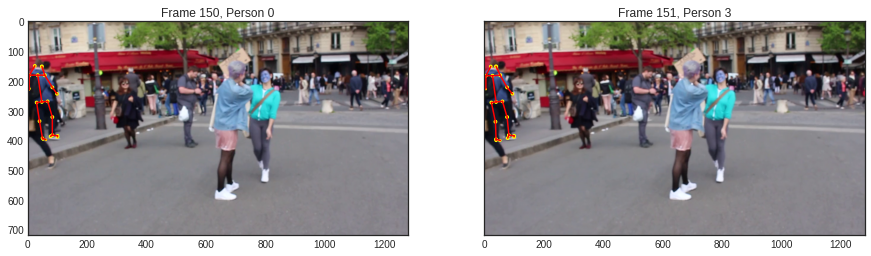

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharex=True, sharey=True)
ax = ax.flatten()

video = cv2.VideoCapture(f'{HSS_DIR}/data/openpose/video.avi')

# fast forward
for i in range(150):
    _, image = video.read()
_, image1 = video.read() # frame 150
_, image2 = video.read() # frame 151

df1 = keypoints_to_dataframe(frame1['people'][0]['pose_keypoints_2d'])
ax[0].scatter(df1.x, df1.y, s=df1.c*10, color='yellow')
ax[0].set(title='Frame 150, Person 0')
ax[0].imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
draw_skeleton(ax[0], df1)

df2 = keypoints_to_dataframe(frame2['people'][3]['pose_keypoints_2d'])
ax[1].scatter(df2.x, df2.y, s=df2.c*10, color='yellow')
ax[1].set(title='Frame 151, Person 3')
ax[1].imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
draw_skeleton(ax[1], df2)

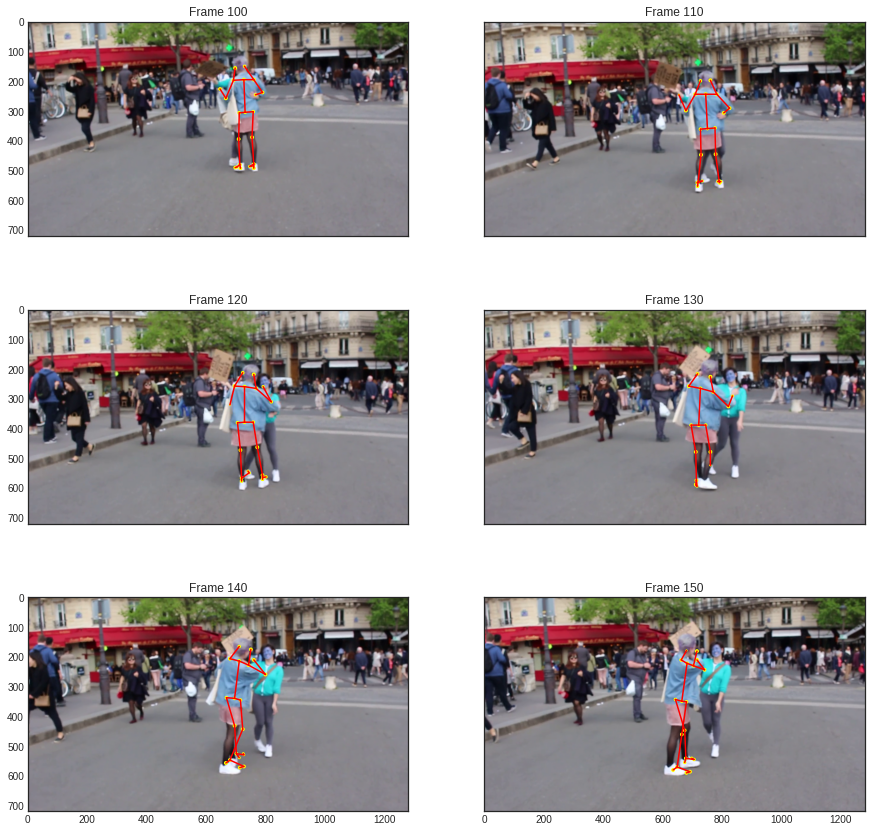

In [39]:
# Extending this further, you should be able to now trace the trajectory of the person
# We will do this every 10 frames

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 15), sharex=True, sharey=True)
ax = ax.flatten()

offset = 100
interval = 10

video = cv2.VideoCapture(f'{HSS_DIR}/data/openpose/video.avi')

# fast forward
for i in range(offset):
    _, image = video.read()

frame = json.load(open(f'{HSS_DIR}/data/openpose/video_{offset:012d}_keypoints.json', 'rb'))
df = keypoints_to_dataframe(frame['people'][0]['pose_keypoints_2d'])
centroid = get_centroid(df)

for i in range(0, 60, interval):
    _, image = video.read()
        
    frame = json.load(open(f'{HSS_DIR}/data/openpose/video_{offset+i:012d}_keypoints.json', 'rb'))
    index = get_closest_index(centroid, frame) # find the closest person
    
    # load keypoints for the closest person
    df = keypoints_to_dataframe(frame['people'][index]['pose_keypoints_2d'])
    
    axis = ax[i//interval]
    axis.scatter(df.x, df.y, s=df.c*10, color='yellow')
    axis.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axis.set(title=f'Frame {offset+i}')
    draw_skeleton(axis, df)
    
    for j in range(interval):
        _, image = video.read() # fast forward
        
    centroid = get_centroid(df) # update centroid since person may have moved

## <font color='red'>Exercise</font>

1. Record a video of yourself doing your favourite activity (walking, waving, jumping, dancing - your choice!). If you prefer not to record a video due to privacy reasons, you can download a sample video. The video can be in AVI or MP4.

   Try a site such as: https://www.videvo.net/free-stock-footage/people/ for free videos of people.


2. Generate keypoints from the video using OpenPose. You do not need the COCO format. Capture at least 10 frames with people.

**Windows**
```
bin\OpenPoseDemo.exe --part_candidates --write_json c:\temp\myvideo --video c:\temp\myvideo.avi --frame_first 2 --frame_step 1 --frame_last 30 --display 0 --disable_blending --render_pose 0
```

**Google Colab**

For example, if you uploaded your video as `myvideo.avi` to the Colab folder, this will generate keypoints in the `myvideo/` folder.

```
!cd openpose && ./build/examples/openpose/openpose.bin --part_candidates --write_json /content/myvideo --video /content/myvideo.avi --frame_first 2 --frame_step 1 --frame_last 30 --display 0 --disable_blending --render_pose 0
```

3. Use the keypoint files to trace the trajectory. You can start with the code below, which performs trajectory tracking for 6 frames, starting with offset 2. Depending on when a person shows up in the video, you will need to modify the frame offset.

    The result can look something like this:
    ![image](https://github.com/lisaong/hss/blob/master/data/openpose/hkstreet.png?raw=1)


### <font color='red'>Submission</font>

<font color='red'>Submit:
- Your copy of the .ipynb showing your result.
- A link to the video you used.
</font>

#### Code for Exercise:

1. Change the paths `video_path` and `keypoints_path` to your video.
2. Change the `offset`, `interval` parameters to match what you used above when extracting keypoints.

In [40]:
n_frames = 6

# modify this to match your parameters to OpenPoseDemo.exe
offset = 2
interval = 1
end = offset + n_frames*interval
person_index = 0 # select the person you want to track

# Path to the video. avi, mp4 both work
# if you downloaded .webm, you can use an online converter like 
# https://www.online-convert.com/
############# CHANGE BELOW PATH ################
#video_path = r'c:/temp/myvideo.avi' # Windows
video_path='/content/myvideo.avi' # Colab
############# CHANGE ABOVE PATH ################

# keypoints files usually contain the video name as prefix
############# CHANGE BELOW PATH ################
#keypoints_path = r'c:/temp/myvideo/myvideo' # Windows
keypoints_path='/content/myvideo/myvideo' # Colab
############# CHANGE ABOVE PATH ################

video = cv2.VideoCapture(video_path)

# fast forward to offset
for i in range(offset):
    _, image = video.read()

frame = json.load(open(f'{keypoints_path}_{offset:012d}_keypoints.json', 'rb'))
df = keypoints_to_dataframe(frame['people'][person_index]['pose_keypoints_2d'])
centroid = get_centroid(df)

# Create the matplotlib axes
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 15), sharex=True, sharey=True)
ax = ax.flatten()

for i, t in zip(range(n_frames), range(offset, end, interval)):
    _, image = video.read()

    frame = json.load(open(f'{keypoints_path}_{t:012d}_keypoints.json', 'rb'))
    index = get_closest_index(centroid, frame) # find the closest person
    
    # load keypoints for the closest person
    df = keypoints_to_dataframe(frame['people'][index]['pose_keypoints_2d'])
    
    axis = ax[i]
    axis.scatter(df.x, df.y, s=df.c*10, color='yellow')
    axis.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axis.set(title=f'Frame {t}')
    draw_skeleton(axis, df)
    
    centroid = get_centroid(df) # update centroid since person may have moved

FileNotFoundError: ignored